In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

import random

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

In [69]:
df = pd.read_csv("data exploration.csv")

# Problem Statement


Which type of shows/movies to produce: Understanding the preferences and trends of viewers to create content that attracts more subscribers and retains existing ones.

# Initial Data Exploration

In [70]:
df.shape

(8807, 12)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [72]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


1. We can convert `date_added` to datetime, then extract yearly, monthly, weekly columns
2. Convert Duration into numerical column.
3. Need to unnest the cast, director, country and listed_in columns.
4. We can drop Description and Title column as they are unique columns.

### Let's check how much missing data is present:

In [73]:
pd.concat([df.isna().sum(),(df.isna().sum()/len(df))*100], axis = 1)

,0,1
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


We can see almost 30% of director data and approx 10% of both cast and country are missing, Except the above mentioned columns date_added, duration and rating has some missing values but they don't amount to much

### Let's check if any row is duplicated?

In [74]:
df.duplicated().sum()

0

### Let's check some statistical data

In [75]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


- Min value of `release_year` is 1925, so some TV Shows or Movies are present that are almost 95 years old
- Only 25% of records that are present in this dataset were released before 2013. So,we have a lot of data that were released in the past decade

In [76]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


- Rajiv Chilaka is has directed most Movies or TV Shows
- Most of the TV Shows or Movies were available in United States
- David Attenborough has worked in most Movies or TV Shows
- Even this particular `"Paranormal activity at a lush...."`description has been repeated four times in Movies/TV Shows. It can suspected that other descrptions are also be repeated
- One thing to Note as we have not yet <strong>unnested the data</strong> these above basic insights might not hold true

In [77]:
df.loc[df.duplicated('description',keep = False)].sort_values('description')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
78,s79,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,"September 11, 2021",2020,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
79,s80,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,"September 11, 2021",2021,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
7022,s7023,Movie,Hum Saath-Saath Hain,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,"January 1, 2018",1999,TV-G,176 min,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...
2969,s2970,Movie,Together For Eternity,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,"February 1, 2020",1999,TV-G,176 min,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...
3492,s3493,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",NaN,"September 25, 2019",2019,TV-14,146 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
3516,s3517,Movie,Oh! Baby,B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,"September 14, 2019",2019,TV-14,157 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
3493,s3494,Movie,Oh! Baby (Tamil),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",NaN,"September 25, 2019",2019,TV-14,146 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
8051,s8052,Movie,Solo: A Star Wars Story,Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,"January 9, 2019",2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...
8052,s8053,Movie,Solo: A Star Wars Story (Spanish Version),Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,"January 9, 2019",2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."


Description column helped to find the repeated Movies/TV Shows or the Movies/TV Shows that were released  in other languages

## Unnesting the Columns

In [78]:
final_df = df.copy()

In [79]:
def remove_spaces(x):
    if x != x:
        return np.nan
    return x.strip()

def unnesting (new_df,col):

    dataframe =new_df.copy()
    dataframe[col] = dataframe[col].str.split(',')
    dataframe = dataframe.explode(col)
    dataframe[col] = dataframe[col].apply(remove_spaces)
    return dataframe

In [80]:
%%time
final_df = unnesting(df,'cast')
print('After splitting cast into muliple rows', final_df.shape)
final_df = unnesting(final_df,'country')
print('After splitting country into muliple rows', final_df.shape)
final_df = unnesting(final_df,'listed_in')
print('After splitting listed_in into muliple rows', final_df.shape)
final_df = unnesting(final_df,'director')
print('After splitting listed_in into muliple rows', final_df.shape)


final_df = final_df.reset_index(drop = True)

After splitting cast into muliple rows (64951, 12)
After splitting country into muliple rows (81741, 12)
After splitting listed_in into muliple rows (186399, 12)
After splitting listed_in into muliple rows (202065, 12)
CPU times: total: 906 ms
Wall time: 1.18 s


## Handling Missing Data

In [81]:
pd.concat([final_df.isna().sum(),(final_df.isna().sum()/len(final_df))*100], axis = 1)

,0,1
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,50643,25.062727
cast,2149,1.063519
country,11897,5.887709
date_added,158,0.078193
release_year,0,0.000000
rating,67,0.033158
duration,3,0.001485


In [82]:
#Smart Imputations is done here
# mode of country grouped by director is imputed for missing values in country
# director_country = (final_df.groupby('director')['country'].\
#                     agg(lambda x: x.mode()[0] if len(x.mode()) > 1 else x.mode())).to_dict()

# # final_df['country1'] = final_df.apply(lambda x: director_country.get(x['director']) if x['country'] != x['country'] else x['country'] ,axis =1  )
# final_df['country'] = final_df['country'].fillna(final_df['director'].map(director_country))

In [83]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director      151422 non-null  object
 4   cast          199916 non-null  object
 5   country       190168 non-null  object
 6   date_added    201907 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        201998 non-null  object
 9   duration      202062 non-null  object
 10  listed_in     202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [84]:
final_df['country']=final_df['country'].fillna('Unknown Country')
final_df['cast']=final_df['cast'].fillna('Unknown Actor')
final_df['director'] = final_df['director'].fillna('Unknown Director')
final_df['listed_in']  = final_df['listed_in'].fillna('Unknown Genre')
final_df['rating'] = final_df['rating'].fillna('Unknown Rating')
final_df['duration'] = final_df['duration'].fillna(0)

## Feature Engineering

### Converted Date added to DateTime column and extracted dayname, day, month, year and week of the year  

In [85]:
final_df['date_added'] = pd.to_datetime(final_df['date_added'].apply(lambda x: str(x).strip()))
final_df['dayname'] = final_df['date_added'].dt.day_name()
final_df['day'] = final_df['date_added'].dt.day
final_df['month'] = final_df['date_added'].dt.month_name()
final_df['year'] = final_df['date_added'].dt.year
final_df['week'] = final_df['date_added'].dt.isocalendar().week
final_df['year_diff'] = final_df['year'] - final_df['release_year']
final_df.drop(columns=['date_added'],inplace = True)

In [86]:
final_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'dayname', 'day', 'month', 'year', 'week', 'year_diff'],
      dtype='object')

In [87]:
def release_year_bins(x):
    if x <= 1960:
        return '<1960'
    elif x>1960 and x <= 1970:
        return '60s'
    elif x>1970 and x <= 1980:
        return '70s'
    elif x>1980 and x <= 1990:
        return '80s'
    else:
        return x

def days_bins(x):
    if x>=1 and x<=7:
        return '1st week'
    elif x>7 and x<=14:
        return '2nd week'
    elif x>14 and x<= 21:
        return '3rd week'
    else:
        return '4th week'
    

In [88]:
final_df['release_year_bins'] = final_df['release_year'].apply(release_year_bins)
final_df['days_bins'] = final_df['day'].apply(days_bins)

### Converted Duration column from object to numerical column

In [89]:
#converting the duration from object type to float
final_df['duration'] = final_df['duration'].str.split(' ',expand = True)[0].astype('float')

### Statistical Summary in unnested data:

In [90]:
final_df.describe()

,release_year,duration,day,year,week,year_diff
count,202065.000000,202062.000000,201907.000000,201907.000000,201907.0,201907.000000
mean,2013.448950,77.687873,12.183431,2018.965440,26.698312,5.514420
std,9.013616,51.482097,9.847135,1.551654,15.051306,9.067137
min,1925.000000,1.000000,1.000000,2008.000000,1.0,-3.000000
25%,2012.000000,4.000000,1.000000,2018.000000,14.0,0.000000
50%,2016.000000,95.000000,12.000000,2019.000000,27.0,2.000000
75%,2019.000000,112.000000,20.000000,2020.000000,39.0,7.000000
max,2021.000000,312.000000,31.000000,2021.000000,53.0,93.000000


In [91]:
final_df.describe(include = 'object')

,show_id,type,title,director,cast,country,rating,listed_in,description,dayname,month,release_year_bins,days_bins
count,202065,202065,202065,202065,202065,202065,202065,202065,202065,201907,201907,202065,202065
unique,8807,2,8807,4994,36440,124,18,42,8775,7,12,35,4
top,s7165,Movie,Kahlil Gibran's The Prophet,Unknown Director,Unknown Actor,United States,TV-MA,Dramas,A troubled young girl and her mother find sola...,Friday,July,2018,1st week
freq,700,145917,700,50643,2149,59350,73915,29806,700,58028,20302,24441,83086


### Here we cannot derive much inferences as due to nesting many records are duplicated

## Non-Graphical Analysis: Value counts and unique attributes  

In [92]:
# this function is to bold python output
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

In [93]:
cols_list = ['type','director','cast','country','release_year','rating','duration','listed_in']

### Value counts and unique attributes in original data

In [94]:
for i in cols_list:
    print(bold_text(i.upper()+':'))
    print(f'Number of unique elements in {i} is:\n {df[i].nunique()}\n')
    print(f'Unique elements present in {i} column is:\n {df[i].unique()}\n')
    print(f'Value Counts of {i} columns is:\n{df[i].value_counts()}\n\n\n')

TYPE:
Number of unique elements in type is:
 2

Unique elements present in type column is:
 ['Movie' 'TV Show']

Value Counts of type columns is:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64



DIRECTOR:
Number of unique elements in director is:
 4528

Unique elements present in director column is:
 ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']

Value Counts of director columns is:
director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64



CAST:
Number of unique elements in cast is:
 7692

Unique elements present in cast column 

### Value counts and unique attributes in unnested data  

In [95]:
cols_list = ['type','rating','director','cast','country','listed_in','release_year_bins','year','week','month','days_bins','dayname']

In [96]:
for i in cols_list:
    print(bold_text(i.upper()+':'))
    print(f'Number of unique elements in {i} is:\n {final_df[i].nunique()}\n')
    print(f'Unique elements present in {i} column is:\n {final_df[i].unique()}\n')
    print(f'Value Counts of {i} columns is:\n{final_df[i].value_counts()}\n\n\n')

TYPE:
Number of unique elements in type is:
 2

Unique elements present in type column is:
 ['Movie' 'TV Show']

Value Counts of type columns is:
type
Movie      145917
TV Show     56148
Name: count, dtype: int64



RATING:
Number of unique elements in rating is:
 18

Unique elements present in rating column is:
 ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'Unknown Rating' 'TV-Y7-FV' 'UR']

Value Counts of rating columns is:
rating
TV-MA             73915
TV-14             43957
R                 25860
PG-13             16246
TV-PG             14926
PG                10919
TV-Y7              6304
TV-Y               3665
TV-G               2779
NR                 1573
G                  1530
NC-17               149
TV-Y7-FV             86
UR                   86
Unknown Rating       67
74 min                1
84 min                1
66 min                1
Name: count, dtype: int64



DIRECTOR:
Number of unique elements in

### Replacing values in Listed in

In [97]:
values = {
    'Dramas':'Drama','Comedies':'Comedy','TV Dramas':'Drama','TV Comedies':'Comedy',
    'Romantic Movies':'Romantic','Romantic TV Shows':'Romantic',
    'Crime TV Shows':'Crime','Horror Movies':'Horror',"Kids' TV":'Kids','Children & Family Movies':'Kids',
    'International Movies':'International','International TV Shows':'International',
    'Independent Movies':'Movies',
    'Music & Musicals':'Music','Anime Series':'Anime','TV Action & Adventure':'Action & Adventure',
    'Spanish-Language TV Shows':'Spanish','British TV Shows':'British','Sports Movies':'Sports','Classic Movies':'Classic',
    'TV Mysteries':'Mystery','Korean TV Shows':'Korean','Cult Movies':'Cult','TV Sci-Fi & Fantasy':'Sci-Fi & Fantasy',
    'Anime Features':'Anime','TV Horror':'Horror','Docuseries':'Documentaries','TV Thrillers':'Thrillers','Teen TV Shows':'Teen',
    'Reality TV':'Reality','Stand-Up Comedy':'Comedy','Stand-Up Comedy & Talk Shows':'Comedy',
    
}
final_df['listed_in'] = final_df['listed_in'].replace(values)

In [98]:
final_df['listed_in'].nunique()

28

### Dividing the dataset into two categories Movies and Shows

In [99]:
movies = final_df[final_df['type'] =='Movie']
shows = final_df[final_df['type'] == 'TV Show']

In [100]:
cols_list = ['type','rating','director','cast','country','listed_in','release_year_bins','year','week','month','days_bins','dayname','duration']

In [101]:
for i in cols_list:
    print(bold_text(i.upper()+':'))
    print(f'Number of unique elements in {i} is:\n {movies[i].nunique()}\n')
    print(f'Unique elements present in {i} column is:\n {movies[i].unique()}\n')
    print(f'Value Counts of {i} columns is:\n{movies[i].value_counts()}\n\n\n')

TYPE:
Number of unique elements in type is:
 1

Unique elements present in type column is:
 ['Movie']

Value Counts of type columns is:
type
Movie    145917
Name: count, dtype: int64



RATING:
Number of unique elements in rating is:
 18

Unique elements present in rating column is:
 ['PG-13' 'PG' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y' 'R' 'TV-G' 'TV-Y7' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'Unknown Rating' 'TV-Y7-FV' 'UR']

Value Counts of rating columns is:
rating
TV-MA             44009
TV-14             29266
R                 25806
PG-13             16246
PG                10919
TV-PG             10312
TV-Y7              2486
TV-Y               1878
TV-G               1738
G                  1530
NR                 1418
NC-17               149
UR                   86
TV-Y7-FV             62
Unknown Rating        9
74 min                1
84 min                1
66 min                1
Name: count, dtype: int64



DIRECTOR:
Number of unique elements in director is:
 4778

Unique el

In [102]:
for i in cols_list:
    print(bold_text(i.upper()+':'))
    print(f'Number of unique elements in {i} is:\n {shows[i].nunique()}\n')
    print(f'Unique elements present in {i} column is:\n {shows[i].unique()}\n')
    print(f'Value Counts of {i} columns is:\n{shows[i].value_counts()}\n\n\n')

TYPE:
Number of unique elements in type is:
 1

Unique elements present in type column is:
 ['TV Show']

Value Counts of type columns is:
type
TV Show    56148
Name: count, dtype: int64



RATING:
Number of unique elements in rating is:
 10

Unique elements present in rating column is:
 ['TV-MA' 'TV-14' 'TV-Y7' 'TV-PG' 'TV-Y' 'TV-G' 'R' 'NR' 'Unknown Rating'
 'TV-Y7-FV']

Value Counts of rating columns is:
rating
TV-MA             29906
TV-14             14691
TV-PG              4614
TV-Y7              3818
TV-Y               1787
TV-G               1041
NR                  155
Unknown Rating       58
R                    54
TV-Y7-FV             24
Name: count, dtype: int64



DIRECTOR:
Number of unique elements in director is:
 300

Unique elements present in director column is:
 ['Unknown Director' 'Julien Leclercq' 'Mike Flanagan' 'Andy Devonshire'
 'Kongkiat Komesiri' 'Olivier Megaton' 'Bunmi Ajakaiye' 'Jason Hehir'
 'Luis Alfaro' 'Javier Gómez Santander' 'Gerhard Mostert' 'Kemi Ad

In [103]:
print("Number of directors that directed both movies and shows are:",\
len(set(movies['director'].unique()).intersection(shows['director'].unique())) )

Number of directors that directed both movies and shows are: 84


In [104]:
print("Number of cast members that worked in both movies and shows are:",\
      len(set(movies['cast'].unique()).intersection(shows['cast'].unique())) )

Number of cast members that worked in both movies and shows are: 4376


### Insights from Non Graphical Analysis:


<br><br><span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    <strong><span style="font-size:16px;">
        &emsp;&emsp;Type:<br></strong></span>
&emsp;&emsp;&emsp;&emsp;There are Only Two types of Show -> Movies and TV Shows<Br>
&emsp;&emsp;&emsp;&emsp;b. Out of 8807 shows 6131 shows are Movies and 2676 shows are TV Shows
<br><br>
<strong><span style="font-size:16px;">&emsp;&emsp;Rating:<br> </strong></span>
	&emsp;&emsp;&emsp;&emsp;a. There were a total of 17 ratings present for movies. Only  9 of which  are ratings used in TV Shows<br>
<br><br>
<strong><span style="font-size:16px;">&emsp;&emsp;Director:<br> </strong></span>
	&emsp;&emsp;&emsp;&emsp;a. There were a total of 4528 directors in original dataset<br>
	&emsp;&emsp;&emsp;&emsp;b. There are a total of 4993 directors in the unnested dataset. Out of which 4777 directors worked in movies and only 299 directors worked in TV shows. Also, 84 directors directed both in Movies and TV Shows.
<br><br>
<strong><span style="font-size:16px;">&emsp;&emsp;Cast:<br> </strong></span>
	&emsp;&emsp;&emsp;&emsp;a. There were a total of 7692 actors in original dataset<br>
	&emsp;&emsp;&emsp;&emsp;b. There are a total of 36439 casted actors/actress present in the unnested dataset. Out of which 25951 worked in movies and 14863 worked in TV Shows. Only 4376 worked both in Movies and TV Shows.
<br><br>
<strong><span style="font-size:16px;">&emsp;&emsp;Country:<br> </strong></span>
	&emsp;&emsp;&emsp;&emsp;a. There were a total of 748 different values of clubbe country in original dataset<br>
	&emsp;&emsp;&emsp;&emsp;b. There are a total of 123 countries where these shows were available. Movies were accessible in 118 different countries and only 66 countries for TV Shows
<br><br>
<strong><span style="font-size:16px;">&emsp;&emsp;Genre/Listed_in:<br> </strong></span>
	&emsp;&emsp;&emsp;&emsp;a. There are a total of 28 genres  values of present in the dataset. Out of which 18 belong to Movies and 21 belong the TV shows<br>
	&emsp;&emsp;&emsp;&emsp;b. There are a total of 123 countries where these shows were available<br>
	&emsp;&emsp;&emsp;&emsp;c. Drama and International Genres have the highest number of movies and TV Shows.
<br><br>
<strong><span style="font-size:16px;">&emsp;&emsp;Years:<br> </strong></span>
	&emsp;&emsp;&emsp;&emsp;a. These movies/TV Shows were released in 74 different years starting from 1925. First TV Shows that was realeased in the dataset was in year 1925 and Movie was in year 1942.<br>
	&emsp;&emsp;&emsp;&emsp;b. 75% of movies were released in the last decade and 75% of Shows were released in last 7 years.<br>
	<br>
	&emsp;&emsp;&emsp;&emsp;c. Only from 2008 these tv shows/movies were added in the company. Most of the tv shows/movies were added in July following by December<br>
	&emsp;&emsp;&emsp;&emsp; Most of the tv shows/movies were released in Friday followed by Thursday
<br><br>
</span>

## Visual Analysis - Univariate, Bivariate after pre-processing of the data

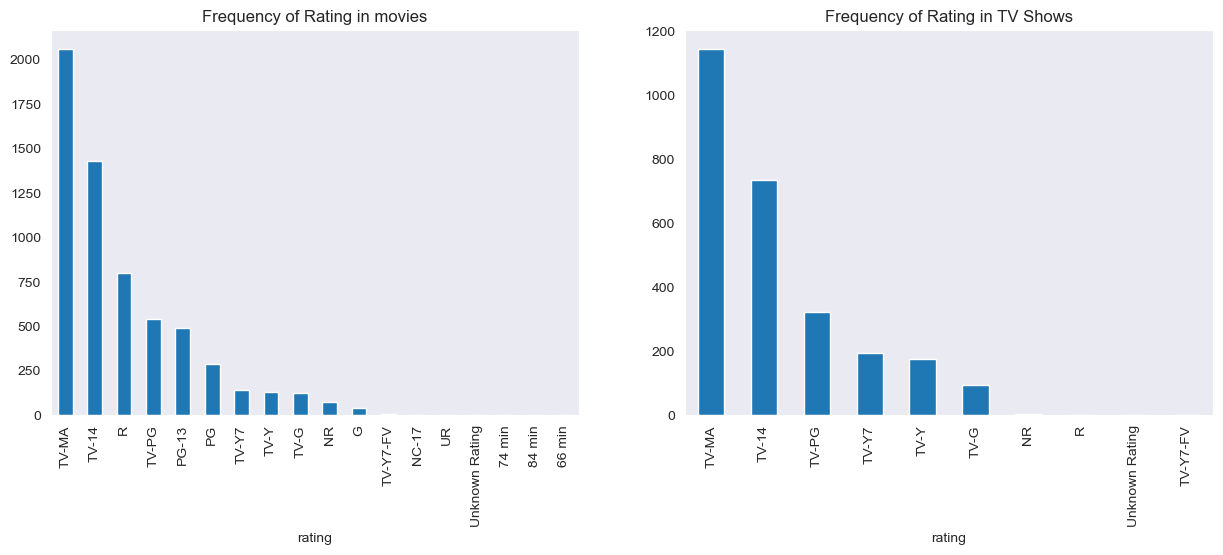

In [105]:
plt.figure(figsize =(15,5))

plt.subplot(1,2,1)
movies[['show_id','rating']].drop_duplicates(keep = 'first')['rating'].value_counts().plot(kind = 'bar')
plt.title('Frequency of Rating in movies')
plt.grid()


plt.subplot(1,2,2)
shows[['show_id','rating']].drop_duplicates(keep = 'first')['rating'].value_counts().plot(kind = 'bar')
plt.title('Frequency of Rating in TV Shows')
plt.grid()

plt.show()

In [106]:
mrating_others = ['NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', 'Unknown Rating',
       '74 min', '84 min', '66 min']
srating_others = ['NR', 'R','TV-G',
       'Unknown Rating', 'TV-Y7-FV']

movies['rating_new'] = movies.rating.apply(lambda x: 'others' if x in mrating_others else x)
shows['rating_new'] = shows.rating.apply(lambda x: 'others' if x in srating_others else x)

In [107]:
shows[['show_id','rating_new']].drop_duplicates(keep = 'first')['rating_new'].value_counts().index

Index(['TV-MA', 'TV-14', 'TV-PG', 'TV-Y7', 'TV-Y', 'others'], dtype='object', name='rating_new')

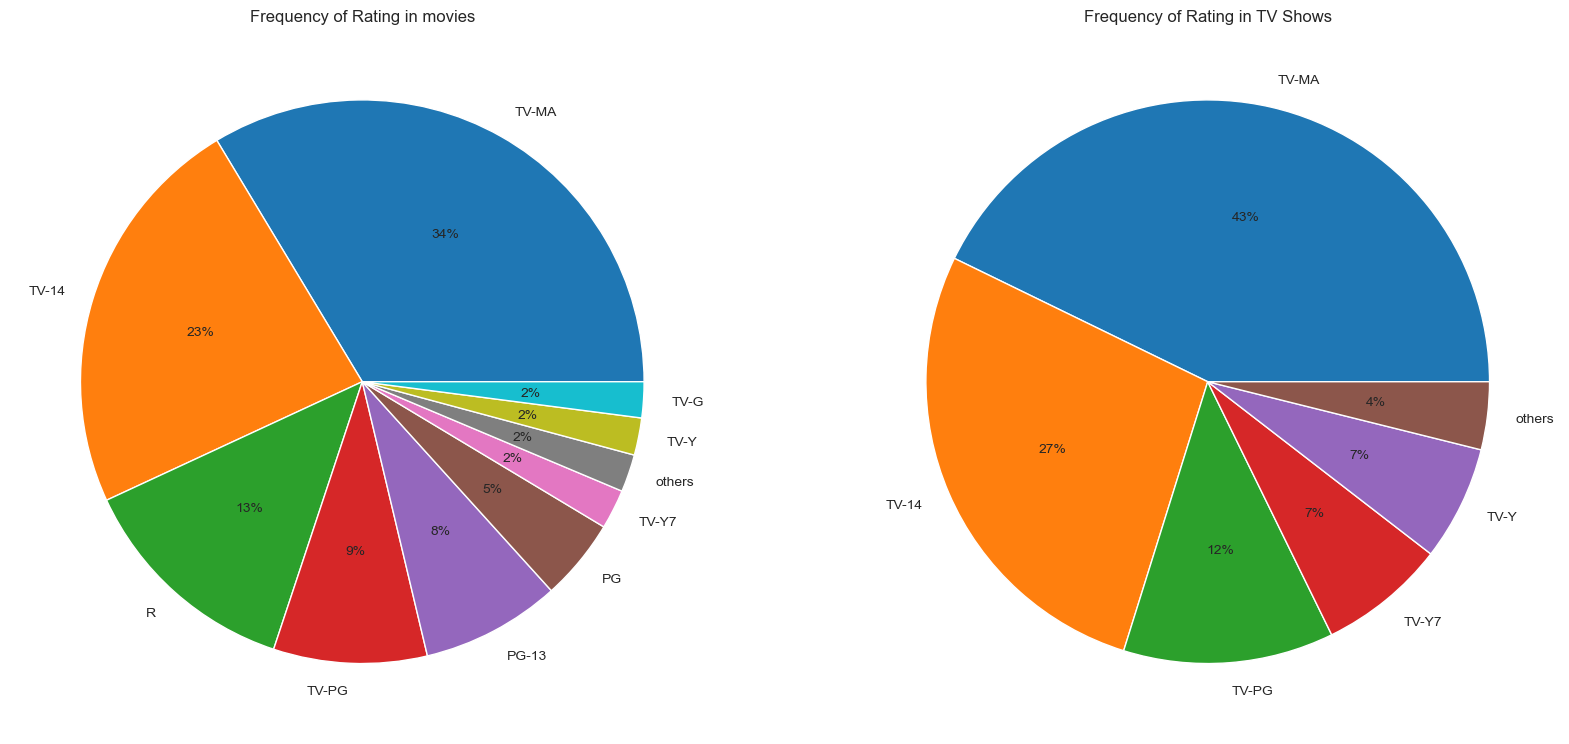

In [108]:
plt.figure(figsize =(20,10))

plt.subplot(1,2,1)
mpie = movies[['show_id','rating_new']].drop_duplicates(keep = 'first')['rating_new'].value_counts()
plt.pie(mpie, labels= mpie.index, autopct='%.0f%%')
plt.title('Frequency of Rating in movies')


plt.subplot(1,2,2)
tpie = shows[['show_id','rating_new']].drop_duplicates(keep = 'first')['rating_new'].value_counts()
plt.pie(tpie, labels= tpie.index, autopct='%.0f%%')
plt.title('Frequency of Rating in TV Shows')

plt.show()

### Inferences from Rating:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
&emsp;&emsp;&emsp;&emsp;a. Netlix caters to a lot of Mature audience, 34% of movies and 48% of tv shows that are avaiable content is for mature<br>
&emsp;&emsp;&emsp;&emsp;b. 23% and 27% movies and tv shows rated respectively as TV-14 i.e. children under age of 14 are not suitable to watch, target audience been mid and late teens<br>
&emsp;&emsp;&emsp;&emsp;c. There are around 13% R Rated movies.<br>
&emsp;&emsp;&emsp;&emsp;d.There are only 4% movies and 14% of TV Shows available for kids(TV-Y and TV-Y7)
    
<span>

In [109]:
label = ['less than 1hr', 'between 1hr and 2hr','between 2hr and 3hr','greater than 3hr']
movies_duration = movies.drop_duplicates(subset=['show_id','duration'], keep='first')['duration']
(pd.cut(movies.drop_duplicates(subset=['show_id','duration'], keep='first')['duration'],
               bins=[1,60,120,180,1000],
               labels = label
).value_counts()/len(movies_duration))*100

duration
between 1hr and 2hr    73.381178
between 2hr and 3hr    17.860055
less than 1hr           7.943239
greater than 3hr        0.766596
Name: count, dtype: float64

In [110]:
shows_duration = shows[['show_id','duration']].drop_duplicates(keep = 'first')['duration']
shows_duration.value_counts()#/len(shows_duration)*100


duration
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
13.0       3
15.0       2
12.0       2
11.0       2
17.0       1
Name: count, dtype: int64

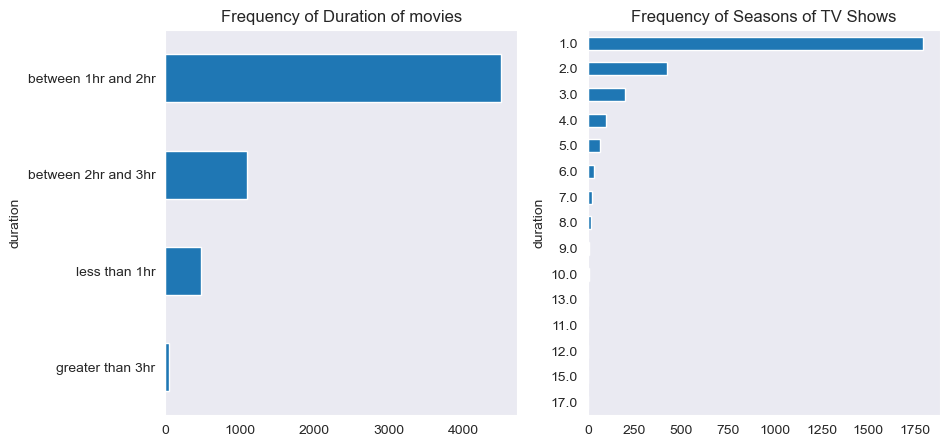

In [111]:
#binning duration of movies
label = ['less than 1hr', 'between 1hr and 2hr','between 2hr and 3hr','greater than 3hr']
movies_duration = movies.drop_duplicates(subset=['show_id','duration'], keep='first')['duration']
(pd.cut(movies.drop_duplicates(subset=['show_id','duration'], keep='first')['duration'],
               bins=[1,60,120,180,1000],
               labels = label
).value_counts()/len(movies_duration))*100

plt.figure(figsize =(10,5))
plt.subplot(1,2,1)
label = ['less than 1hr', 'between 1hr and 2hr','between 2hr and 3hr','greater than 3hr']
plt.title('Frequency of Duration of movies')
pd.cut(movies.drop_duplicates(subset=['show_id','duration'], keep='first')['duration'],
               bins=[1,60,120,180,1000],
               labels = label
).value_counts(ascending = True).plot(kind = 'barh')
plt.grid()

plt.subplot(1,2,2)
shows[['show_id','duration']].drop_duplicates(keep = 'first')['duration'].value_counts(ascending = True).plot(kind = 'barh')
plt.title('Frequency of Seasons of TV Shows')
plt.grid()

plt.show()

### Inferences for Duration:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
&emsp;&emsp;&emsp;&emsp;a. 4499(~73%) movies are between 1hr and 2hr. 1095 Movies are between 2hr and 3hr.<br>
&emsp;&emsp;&emsp;&emsp;b. 487 movies are less than 1hr. Only 47 movies are greater than 3hr.<br>
&emsp;&emsp;&emsp;&emsp;c. TV Shows are mostly of only one season around 65%. There's one such TV Show which has 17 seasons.<br>
&emsp;&emsp;&emsp;&emsp;d. There are only 26 such TV shows which have more than 8 seasons
    
<span>

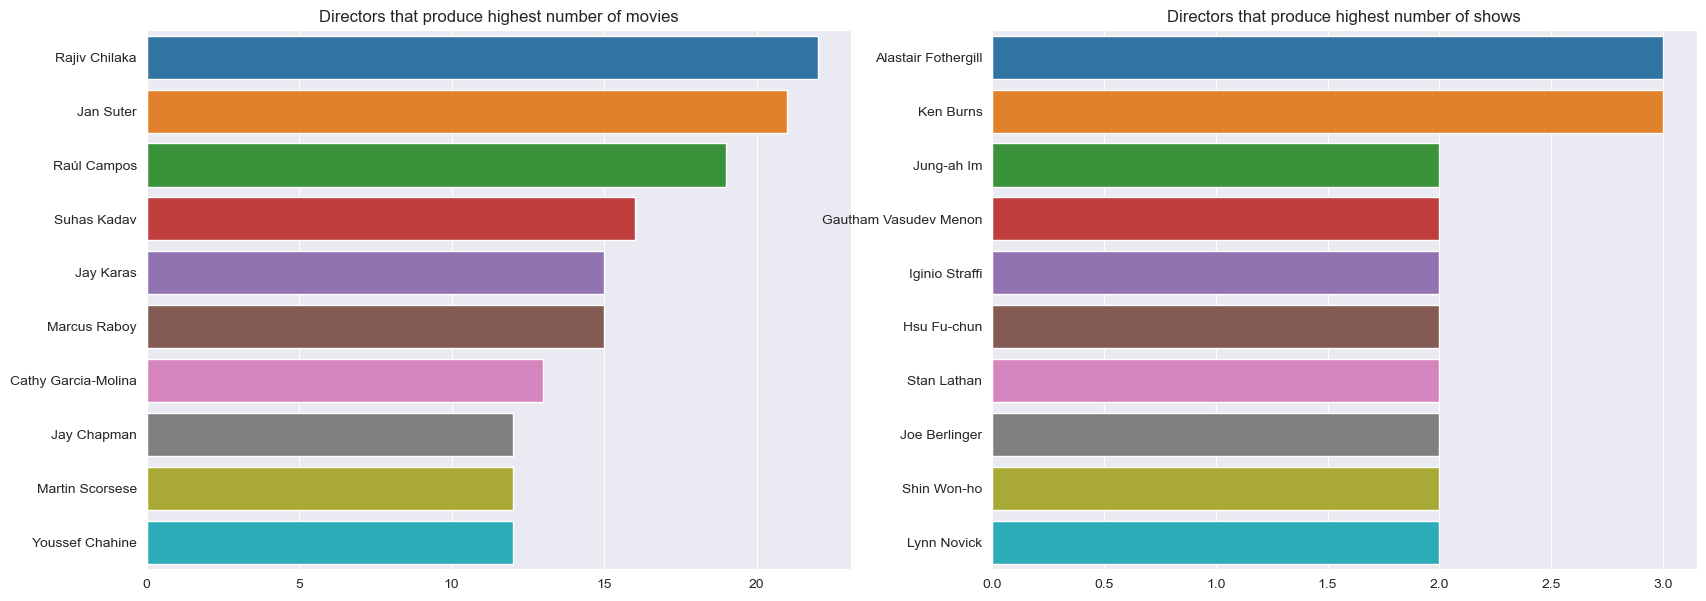

In [112]:
plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
mask = movies['director'] == 'Unknown Director'
movies_director= movies.loc[~mask,['show_id','director']].drop_duplicates(keep = 'first')['director'].value_counts().head(10)
sns.barplot(x = movies_director, y = movies_director.index )
plt.title('Directors that produce highest number of movies')
plt.ylabel('')
plt.xlabel('')



plt.subplot(1,2,2)
mask = shows['director'] == 'Unknown Director'
shows_director= shows.loc[~mask,['show_id','director']].drop_duplicates(keep = 'first')['director'].value_counts().head(10)
sns.barplot(x = shows_director, y = shows_director.index )
plt.title('Directors that produce highest number of shows')
plt.ylabel('')
plt.xlabel('')

plt.show()

### Inferences for Directors:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. Rajiv Chilaka directed highest number of movies.<br>
    &emsp;&emsp;&emsp;&emsp;b. Alaistar Fothergill directed highest number of TV Shows.<br>
<span>

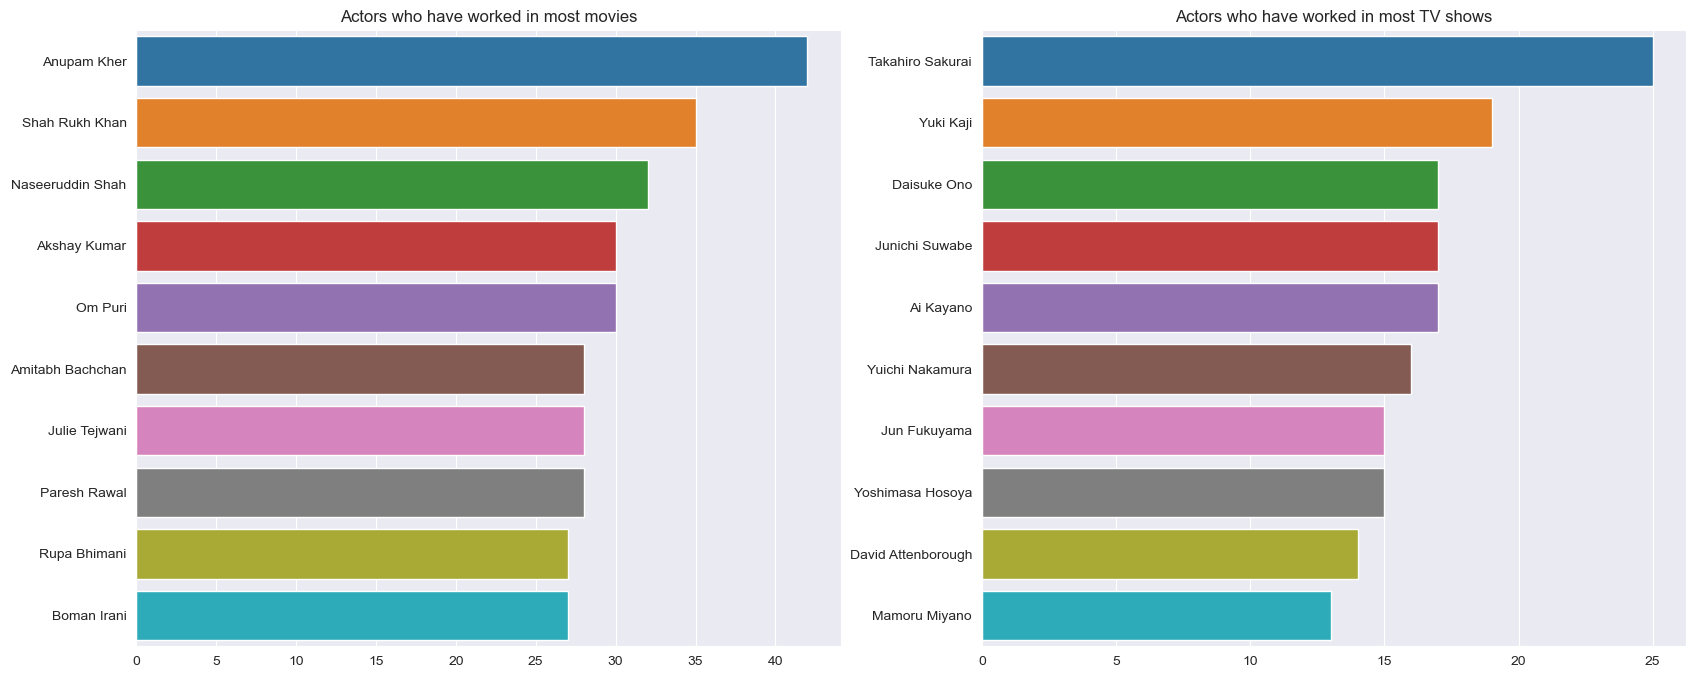

In [113]:
plt.figure(figsize =(20,8))

plt.subplot(1,2,1)
mask = movies['cast'] == 'Unknown Actor'
casts = movies.loc[~mask,['show_id','cast']].drop_duplicates(keep = 'first')['cast'].value_counts().head(10)
sns.barplot(x=casts,y = casts.index)
plt.title('Actors who have worked in most movies')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1,2,2)
mask = shows['cast'] == 'Unknown Actor'
casts = shows.loc[~mask,['show_id','cast']].drop_duplicates(keep = 'first')['cast'].value_counts().head(10)
sns.barplot(x=casts,y = casts.index)
plt.title('Actors who have worked in most TV shows')
plt.ylabel('')
plt.xlabel('')

plt.show()

### Inferences from Cast:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. Anupam Kher has appeared in most of movies.<br>
    &emsp;&emsp;&emsp;&emsp;b. Takahiko Sakurai has apperead in most of TV Shows.<br>
    
<span>

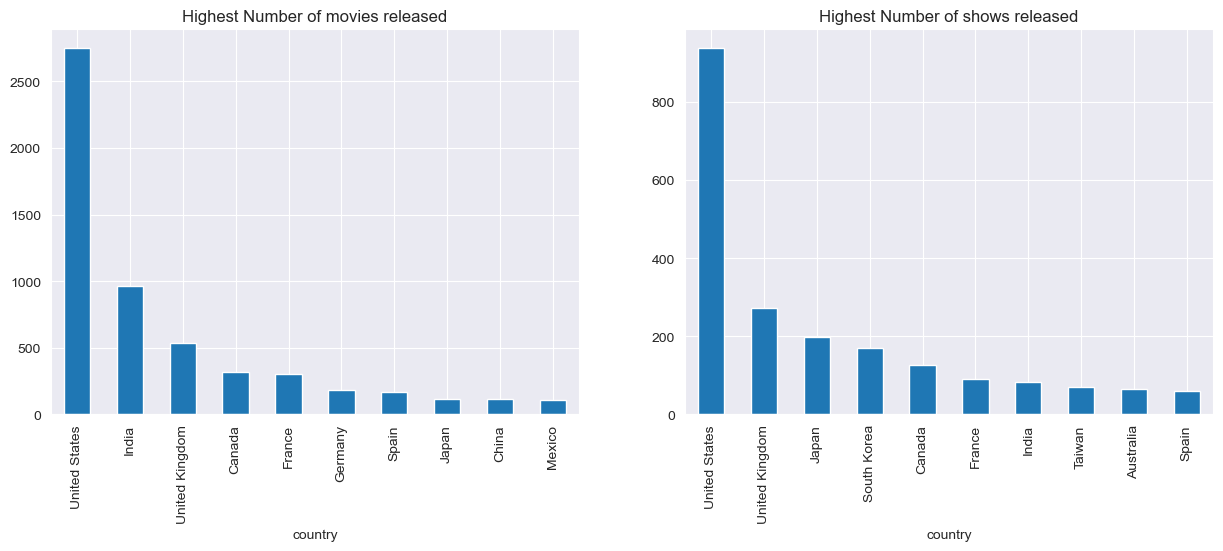

In [114]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
mask = movies['country'] == 'Unknown Country'
movies.loc[~mask,['show_id','country']].drop_duplicates(keep = 'first')['country'].value_counts().head(10).plot(kind = 'bar')
plt.title('Highest Number of movies released')


plt.subplot(1,2,2)
mask = shows['country'] == 'Unknown Country'
shows.loc[~mask,['show_id','country']].drop_duplicates(keep = 'first')['country'].value_counts().head(10).plot(kind = 'bar')
plt.title('Highest Number of shows released')

plt.show()

### Inferences from Country:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. Highest number of movies were released in United States Followed by India and Uk. <br>
    &emsp;&emsp;&emsp;&emsp;b. Highest number of TV Shows were released in United States followed by UK and Japan.
    
    
<span>

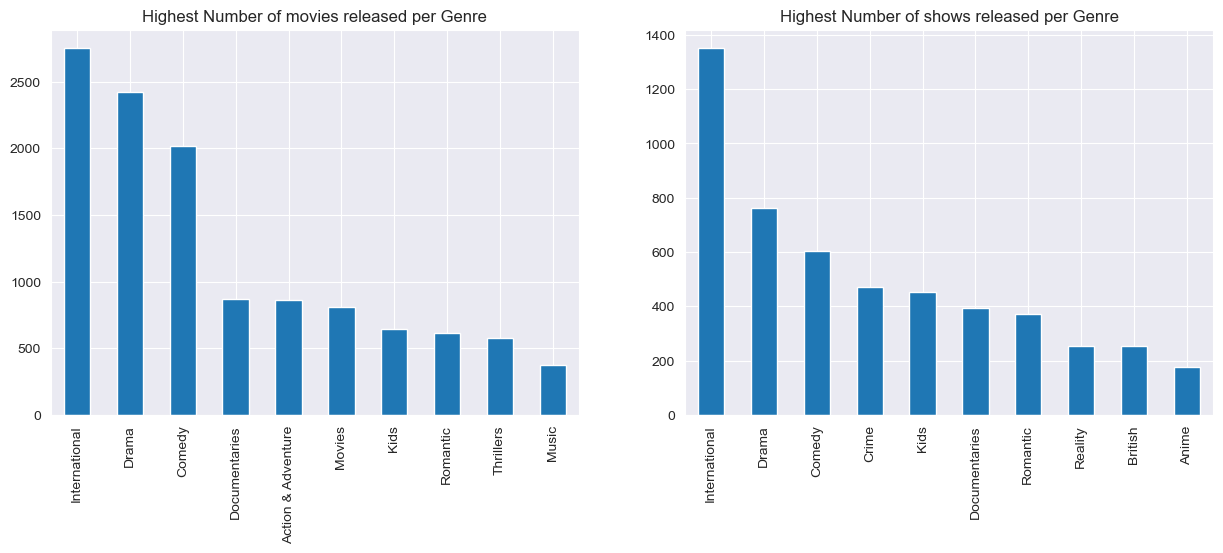

In [115]:
plt.figure(figsize =(15,5))
plt.subplot(1,2,1)
movies[['show_id','listed_in']].drop_duplicates(keep = 'first')['listed_in'].value_counts().head(10).plot(kind = 'bar')
plt.title('Highest Number of movies released per Genre')
plt.ylabel('')
plt.xlabel('')


plt.subplot(1,2,2)
shows[['show_id','listed_in']].drop_duplicates(keep = 'first')['listed_in'].value_counts().head(10).plot(kind = 'bar')
plt.title('Highest Number of shows released per Genre')
plt.ylabel('')
plt.xlabel('')

plt.show()

### Observations from Genres:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. Highest Number of Movies/TV Shows are from International Movies, Dramas and Comedy Shows.
    
    
<span>

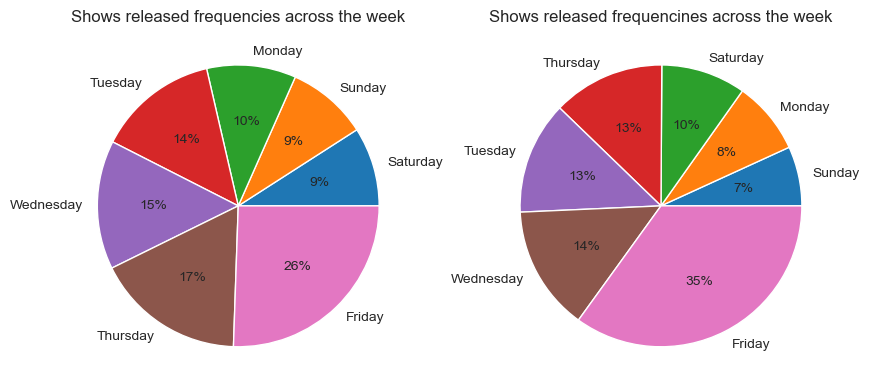

In [116]:
plt.figure(figsize =(10,5))

plt.subplot(1,2,1)
day_name = movies[['show_id','dayname']].drop_duplicates(keep = 'first')['dayname'].value_counts(ascending = True)
plt.pie(day_name, labels= day_name.index, autopct='%.0f%%')
plt.title('Shows released frequencies across the week')

plt.subplot(1,2,2)
day_name = shows[['show_id','dayname']].drop_duplicates(keep = 'first')['dayname'].value_counts(ascending = True)
plt.pie(day_name, labels= day_name.index, autopct='%.0f%%')
plt.title('Shows released frequencines across the week')
plt.show()

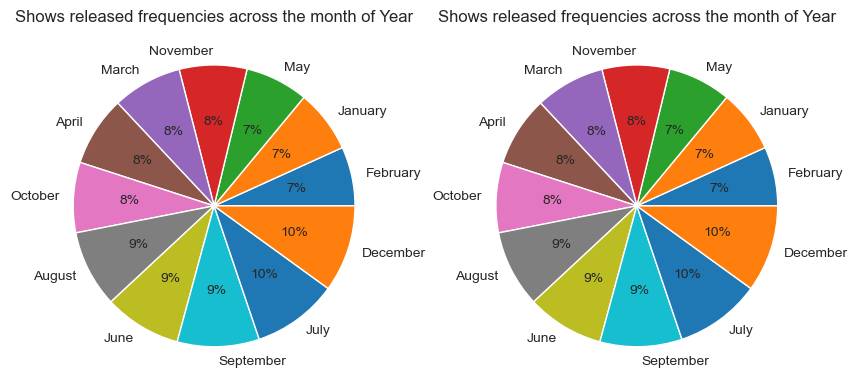

In [117]:
plt.figure(figsize =(10,5))

plt.subplot(1,2,1)
month_name = shows[['show_id','month']].drop_duplicates(keep = 'first')['month'].value_counts(ascending = True)
plt.pie(month_name, labels= month_name.index, autopct='%.0f%%')
plt.title('Shows released frequencies across the month of Year')

plt.subplot(1,2,2)
month_name = shows[['show_id','month']].drop_duplicates(keep = 'first')['month'].value_counts(ascending = True)
plt.pie(month_name, labels= month_name.index, autopct='%.0f%%')
plt.title('Shows released frequencies across the month of Year')

plt.show()

### Observations:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. Most of the TV Shows/Movies are added in December or July
    
<span>

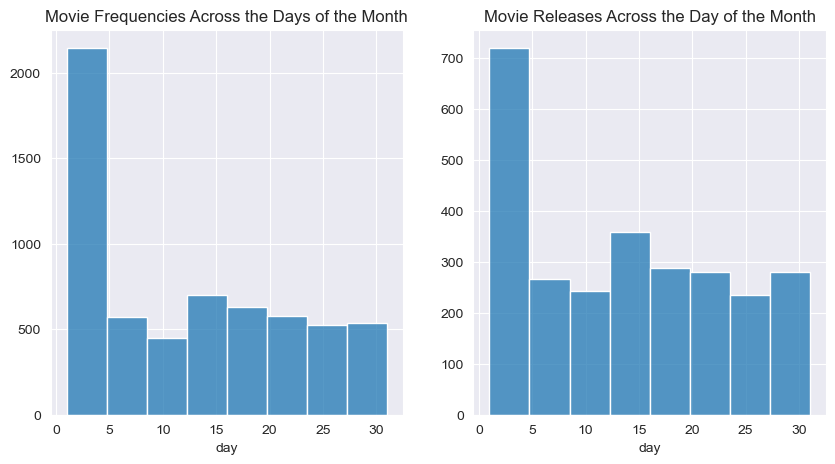

In [118]:
plt.figure(figsize =(10,5))

plt.subplot(1,2,1)
days = movies[['show_id','day']].drop_duplicates(keep = 'first')['day']
sns.histplot(days,bins = 8)
plt.title('Movie Frequencies Across the Days of the Month')
plt.ylabel('')

plt.subplot(1,2,2)
days = shows[['show_id','day']].drop_duplicates(keep = 'first')['day']
sns.histplot(days,bins = 8)
plt.title('Movie Releases Across the Day of the Month')
plt.ylabel('')
plt.show()

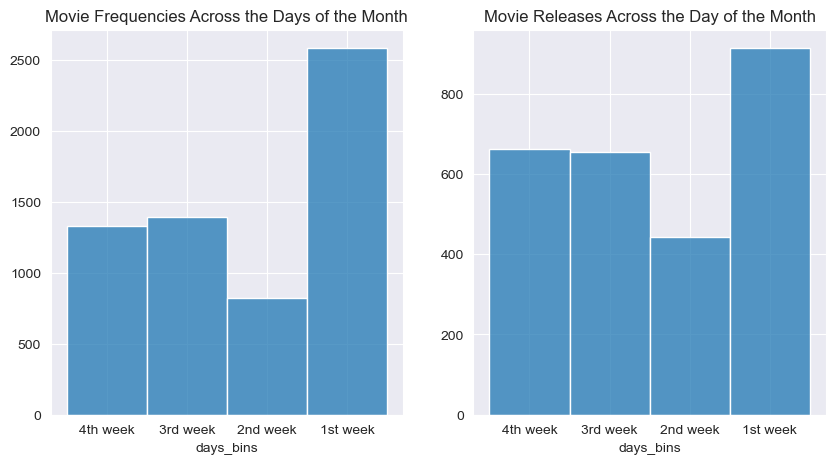

In [119]:
plt.figure(figsize =(10,5))

plt.subplot(1,2,1)
days = movies[['show_id','days_bins']].drop_duplicates(keep = 'first')['days_bins']
sns.histplot(days,bins = 8)
plt.title('Movie Frequencies Across the Days of the Month')
plt.ylabel('')

plt.subplot(1,2,2)
days = shows[['show_id','days_bins']].drop_duplicates(keep = 'first')['days_bins']
sns.histplot(days,bins = 8)
plt.title('Movie Releases Across the Day of the Month')
plt.ylabel('')
plt.show()

### Observations:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. Most of the TV Shows/Movies are added in the first week
    
<span>

In [120]:
movies[['listed_in','director']].drop_duplicates(keep = 'first').groupby('listed_in').agg(lambda x: x.mode()[:2])

,director
listed_in,
Action & Adventure,"[A. Salaam, A.R. Murugadoss]"
Anime,"[Akihiko Yamashita, Akira Saitoh]"
Classic,"[Alfonso Arau, Anthony Veiller]"
Comedy,"[A. L. Vijay, Aanand Rai]"
Cult,"[Alejandro Doria, Alex Proyas]"
Documentaries,"[Aaron Hancox, Aaron Lieber]"
Drama,"[A. L. Vijay, A. Raajdheep]"
Faith & Spirituality,"[Alexandre Avancini, Archie Hekagery]"
Horror,"[Abhijit Kokate, Adam Egypt Mortimer]"


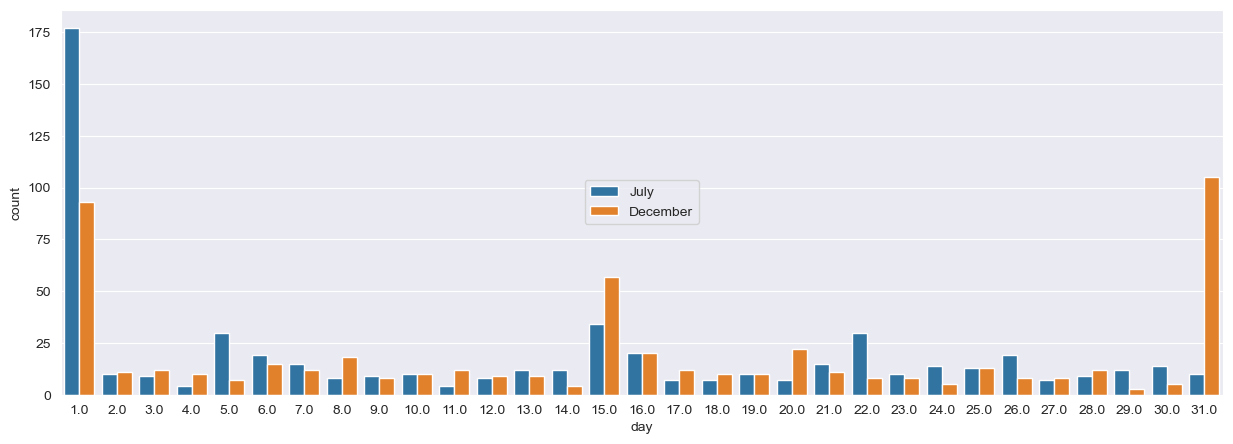

In [121]:
mon_list = np.array(['December','July'])
mon_movies = movies.loc[movies['month'].isin(mon_list),['show_id','day','month']].drop_duplicates(keep = 'first')
plt.figure(figsize = (15,5))
sns.countplot(data = mon_movies,x = 'day',hue = 'month')
plt.legend(loc='center')
plt.show()

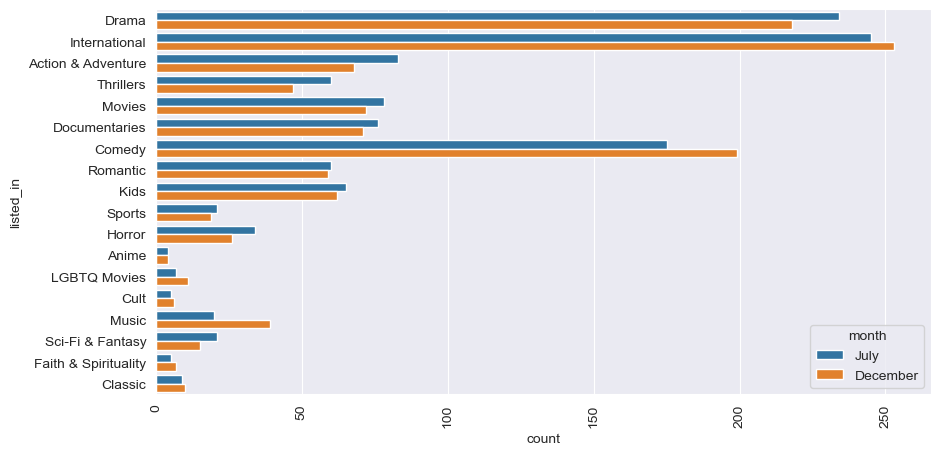

In [122]:
plt.figure(figsize =(10,5))

mon_list = np.array(['December','July'])
mon_movies = movies.loc[movies['month'].isin(mon_list),['show_id','listed_in','month']].drop_duplicates(keep = 'first')[['month','listed_in']]
sns.countplot(data = mon_movies,y = 'listed_in',hue = 'month')
plt.xticks(rotation  = 90)
plt.show()

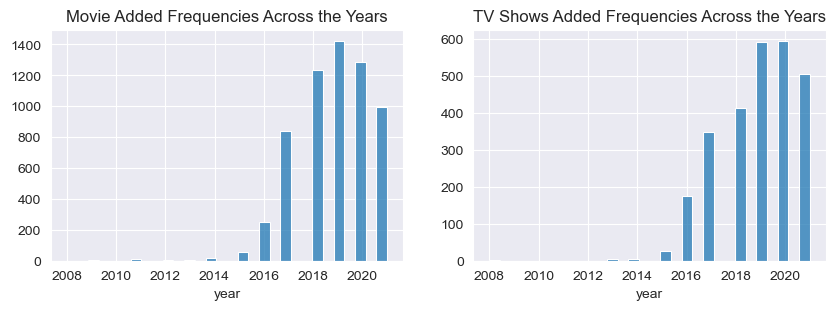

In [123]:
plt.figure(figsize =(10,3))

plt.subplot(1,2,1)
days = movies[['show_id','year']].drop_duplicates(keep = 'first')['year']
sns.histplot(days,bins = 30)
plt.title('Movie Added Frequencies Across the Years')
plt.ylabel('')

plt.subplot(1,2,2)
days = shows[['show_id','year']].drop_duplicates(keep = 'first')['year']
sns.histplot(days,bins = 30)
plt.title('TV Shows Added Frequencies Across the Years')
plt.ylabel('')
plt.show()

### Inferences from Date Added :
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. Most of the TV Shows/Movies are added in December or July<br>
    &emsp;&emsp;&emsp;&emsp;b. Most of the TV Shows/Movies are added in the first week<br>
    &emsp;&emsp;&emsp;&emsp;c. Most of the movies are added in Month of December or July in the first week or last week<br>
    &emsp;&emsp;&emsp;&emsp;d. Most of the movies are added in Month of December or July have genres Dramas International Movies and Comedies<br>
    &emsp;&emsp;&emsp;&emsp;e. Most of the TV Shows are added in Month of December or July in the first week or last week<br>
    &emsp;&emsp;&emsp;&emsp;f. Most of the TV Shows are added in Month of December or July have genres Dramas International Movies and Comedies<br>
    &emsp;&emsp;&emsp;&emsp;g. Range of Year Added in 13 years<br>
    
<span>

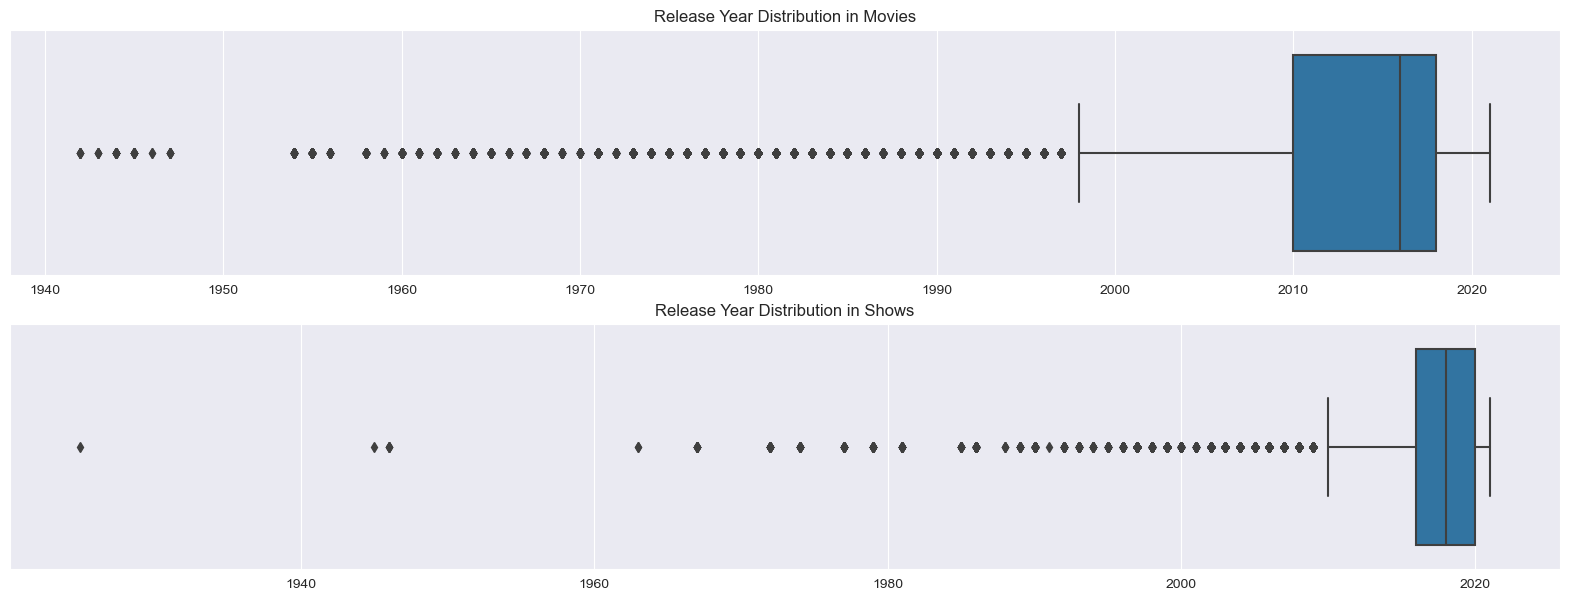

In [124]:
plt.figure(figsize = (20,7))
plt.subplot(2,1,1)
sns.boxplot(data = movies,x= 'release_year')
plt.title('Release Year Distribution in Movies')
plt.xlabel('')

plt.subplot(2,1,2)
sns.boxplot(data = shows,x = 'release_year')
plt.title('Release Year Distribution in Shows')
plt.xlabel('')

plt.show()


In [125]:
df[df['type'] == 'Movie'].describe()

,release_year
count,6131.000000
mean,2013.121514
std,9.678169
min,1942.000000
25%,2012.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [126]:
df[df['type'] == 'TV Show'].describe()

,release_year
count,2676.000000
mean,2016.605755
std,5.740138
min,1925.000000
25%,2016.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


### Inferences from Release Year:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. Very few movies were released before 2000 that are present in this dataset<br>
    &emsp;&emsp;&emsp;&emsp;b. Very few TV Shows were released before 2010 that are present in this dataset<br>
    &emsp;&emsp;&emsp;&emsp;c. Most of the movies were released between 2012 to 2018 that are present in this dataset<br>
    &emsp;&emsp;&emsp;&emsp;d. Very few TV Shows were released between 2016 to 2020 that are present in this dataset<br>
    &emsp;&emsp;&emsp;&emsp;e. Range of Release Year for Movies is equal to 79 years, for TV Shows it is equal to 96 years
    
<span>

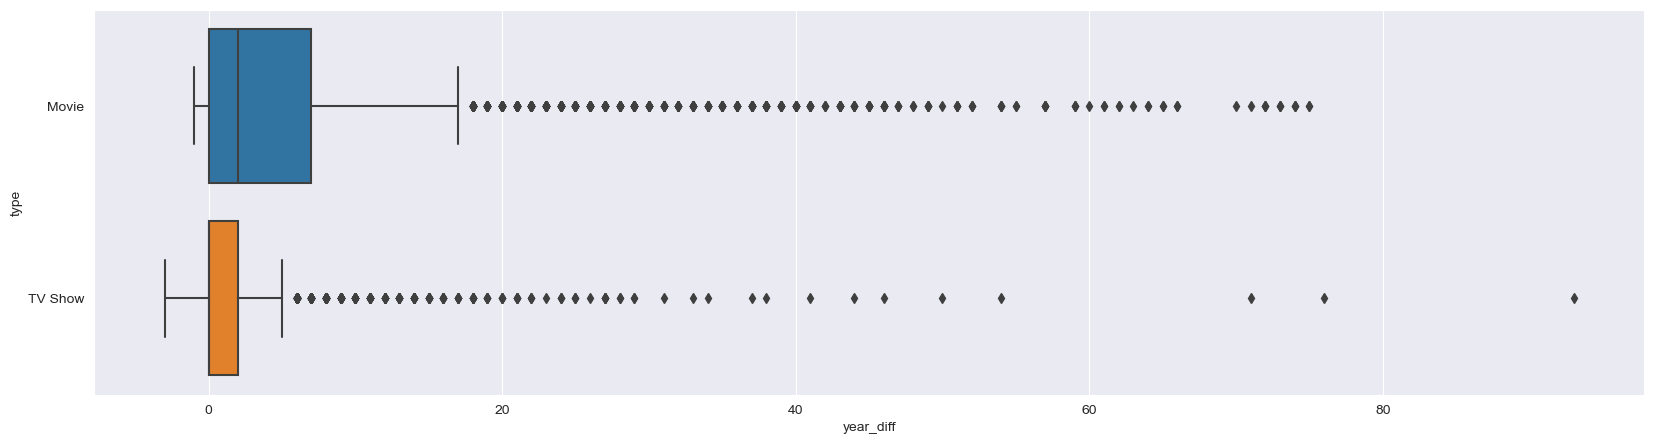

In [127]:
plt.figure(figsize = (20,5))
box = final_df[['show_id','type','year_diff']].drop_duplicates()
sns.boxplot(data = box,x='year_diff',y  = 'type')
plt.show()

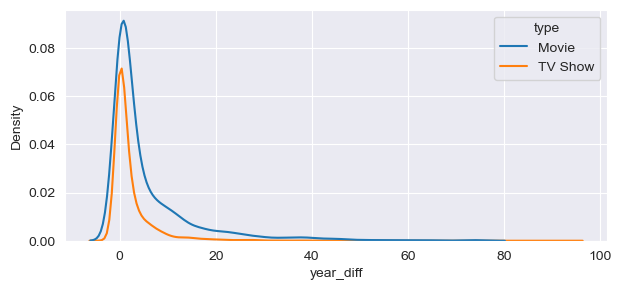

In [128]:
plt.figure(figsize = (7,3))
box = final_df[['show_id','type','year_diff']].drop_duplicates()
sns.kdeplot(data = box,x='year_diff',hue= 'type')
plt.show()


In [129]:
box[box['type'] == 'Movie'].max()

show_id       s999
type         Movie
year_diff     75.0
dtype: object

In [130]:
box[box['type'] == 'TV Show'].max()

show_id         s998
type         TV Show
year_diff       93.0
dtype: object

### Inferences from difference between year added and year released:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. Most of the movies/tv shows were added in the same year as it was released<br>
    &emsp;&emsp;&emsp;&emsp;b. Highest year difference between when it was released and when it was added is 75 and 93 for movies and TV Shows respectively<br>    
<span>

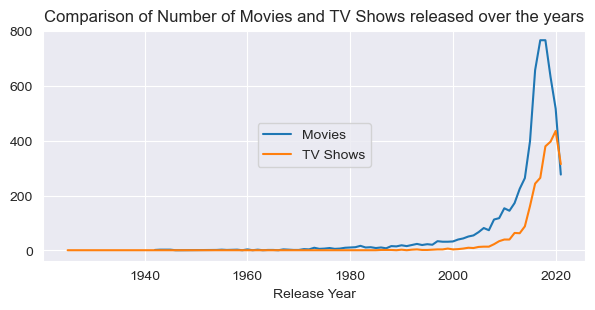

In [131]:
plt.figure(figsize = (7,3))

movies_released_per_year = df.loc[df['type']=='Movie','release_year'].value_counts().sort_index()
sns.lineplot(x = movies_released_per_year.index,y = movies_released_per_year,label = 'Movies')

shows_released_per_year = df.loc[df['type']=='TV Show','release_year'].value_counts().sort_index()
sns.lineplot(x =shows_released_per_year.index,y = shows_released_per_year,label = 'TV Shows')

plt.xlabel('Release Year')
plt.ylabel('')
plt.title('Comparison of Number of Movies and TV Shows released over the years')
plt.legend(loc = 'center')

plt.show()

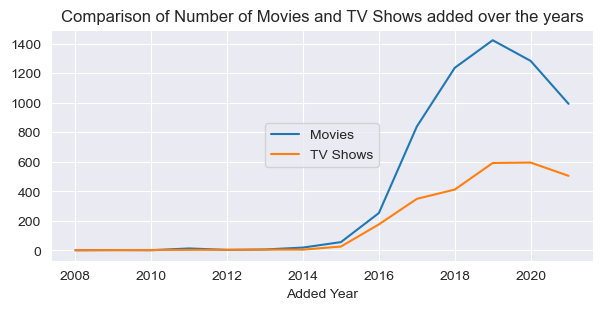

In [132]:
plt.figure(figsize = (7,3))

movies_added_per_year = movies.groupby('year')['show_id'].nunique()
sns.lineplot(x = movies_added_per_year.index,y = movies_added_per_year,label = 'Movies')

shows_added_per_year = shows.groupby('year')['show_id'].nunique()
sns.lineplot(x =shows_added_per_year.index,y = shows_added_per_year,label = 'TV Shows')

plt.xlabel('Added Year')
plt.ylabel('')
plt.title('Comparison of Number of Movies and TV Shows added over the years')
plt.legend(loc = 'center')

plt.show()

### Number of Shows Released Across the Years :
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. In the recent years we can there has been a drop in release as well as drop in addition of Movies and Tv Shows. This maybe due to lack of data. As we donot have data we cannot conclude the above statement as true<br>
<span>

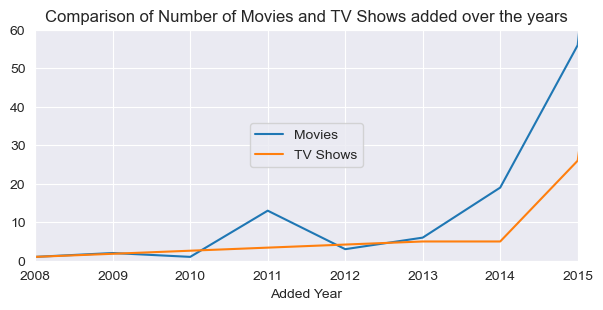

In [133]:
plt.figure(figsize = (7,3))

movies_added_per_year = movies.groupby('year')['show_id'].nunique()
sns.lineplot(x = movies_added_per_year.index,y = movies_added_per_year,label = 'Movies')

shows_added_per_year = shows.groupby('year')['show_id'].nunique()
sns.lineplot(x =shows_added_per_year.index,y = shows_added_per_year,label = 'TV Shows')

plt.xlabel('Added Year')
plt.ylabel('')
plt.title('Comparison of Number of Movies and TV Shows added over the years')
plt.legend(loc = 'center')
plt.xlim(2008,2015)
plt.ylim(0,60)

plt.show()

### Number of Shows Added across the years:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. There has been spike in addtion of Movies and spike in addtion of TV Shows from 2013 and 2014 respectively.<span>

In [136]:
# # sns.pairplot(data = movies)
# plt.show()

In [137]:
# sns.pairplot(data = shows)
# plt.show()

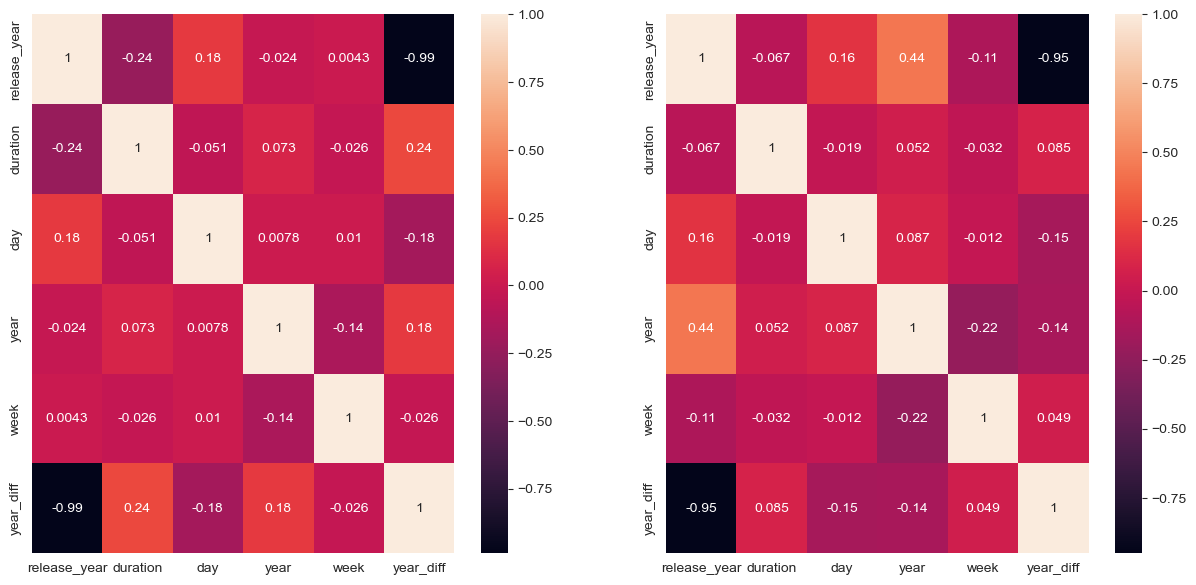

In [138]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.heatmap(movies[['release_year','duration','day','year','week','year_diff']].corr(),annot = True)



plt.subplot(1,2,2)
sns.heatmap(shows[['release_year','duration','day','year','week','year_diff']].corr(),annot = True)
plt.show()

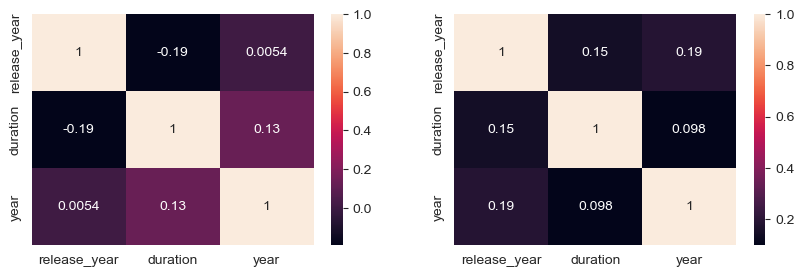

In [139]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
corr_mov_data = movies[['release_year','duration','year']].drop_duplicates()
sns.heatmap(corr_mov_data.corr(),annot = True)



plt.subplot(1,2,2)
corr_shows_data = shows[['release_year','duration','year']].drop_duplicates()
sns.heatmap(corr_shows_data.corr(),annot = True)
plt.show()

### Observations:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a.  Except for release_year and year_diff, any clear correlation between any other columns cannot been seen.<span>

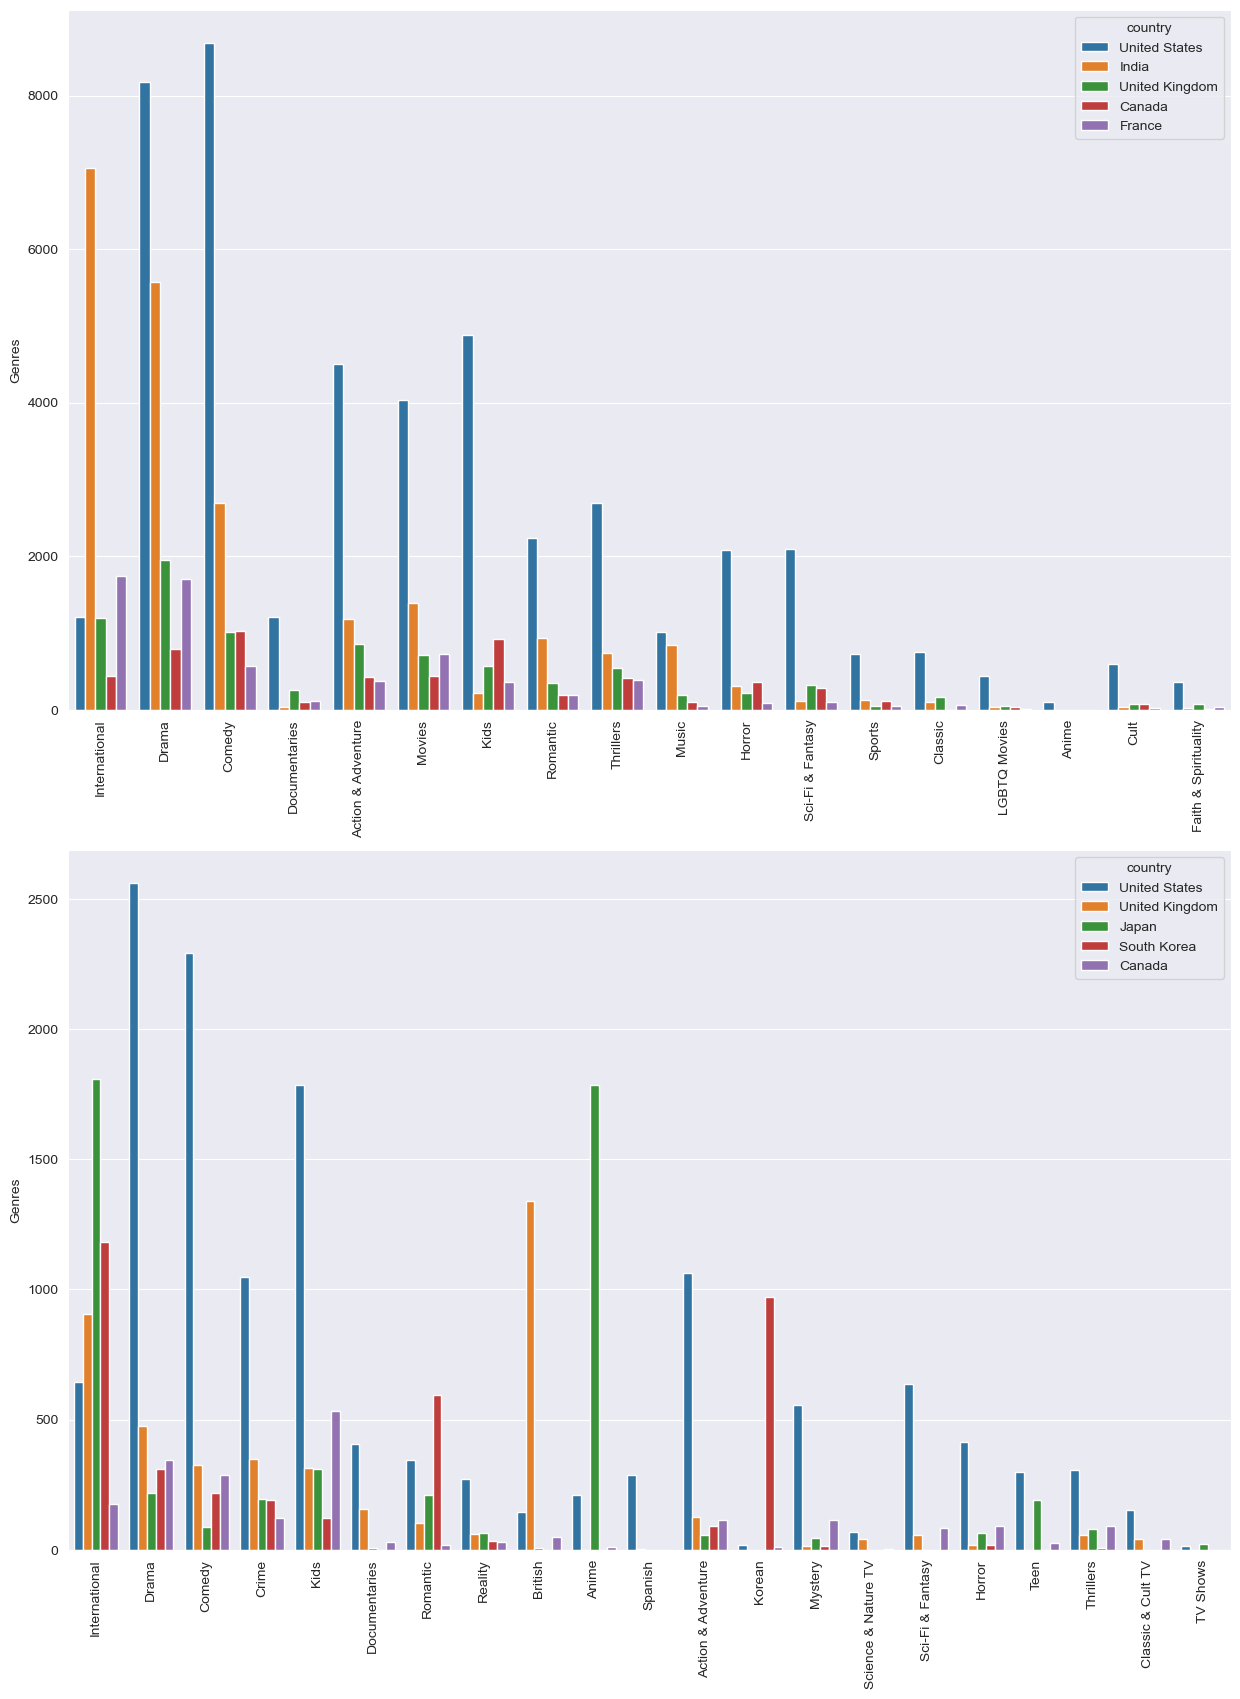

In [140]:
mask = movies['country'] == 'Unknown Country'
mov_country_list = movies.loc[~mask,['show_id','country']].drop_duplicates(keep = 'first')['country'].value_counts().head(5).index.tolist()

mask = shows['country'] == 'Unknown Country'
show_country_list = shows.loc[~mask,['show_id','country']].drop_duplicates(keep = 'first')['country'].value_counts().head(5).index.tolist()


mov_cg = movies[movies['country'].isin(mov_country_list)]
show_cg = shows[shows['country'].isin(show_country_list)]

mov_order = movies[['show_id','listed_in']].drop_duplicates(keep = 'first')['listed_in'].value_counts().index.tolist()
show_order = shows[['show_id','listed_in']].drop_duplicates(keep = 'first')['listed_in'].value_counts().index.tolist()

plt.figure(figsize = (15,20))

plt.subplot(2,1,1)
sns.countplot(data = mov_cg,x = 'listed_in',hue = 'country',order = mov_order,hue_order=mov_country_list)
plt.ylabel('Genres')
plt.xlabel('')
plt.xticks(rotation = 90)

plt.subplot(2,1,2)
sns.countplot(data = show_cg,x = 'listed_in',hue = 'country',order = show_order,hue_order=show_country_list)
plt.ylabel('Genres')
plt.xlabel('')
plt.xticks(rotation = 90)
plt.show()

### Inferneces from Top 5 Countries and Genres:
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. Most TV shows in United States are of Dramas, Comedy and Kids Genre.<Br>
    &emsp;&emsp;&emsp;&emsp;b. Most TV Shows in United Kingdom are of British TV shows, International Shows and Dramas.<br>
    &emsp;&emsp;&emsp;&emsp;c. Most TV shows in Japan are of International Shows and Anime Series.<Br>
    &emsp;&emsp;&emsp;&emsp;d. Most TV Shows in South Korea are of International Shows, Korean and Romantic TV Shows.<br><br>
    &emsp;&emsp;&emsp;&emsp;e. Most Movies in United States are of Dramas and Comedy.<Br>
    &emsp;&emsp;&emsp;&emsp;f. Most Movies in United Kingdom are of International Movies, Dramas and Comedy Genre.<br>
    &emsp;&emsp;&emsp;&emsp;g. Most Movies in India are of International Movies, Dramas and Comedy Genre.<Br>
    &emsp;&emsp;&emsp;&emsp;h. Most Movies in France are of International Movies and Dramas.<br>

    

## Buisness Insights
<br><br><span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    <strong><span style="font-size:16px;">
        &emsp;&emsp;Type:<br></strong></span>
    &emsp;&emsp;&emsp;&emsp;a. There are Only Two types of Show -> Movies and TV Shows<Br>
    &emsp;&emsp;&emsp;&emsp;b. Out of 8807 shows 6131 shows are Movies and 2676 shows are TV Shows
<br><br>

<strong><span style="font-size:16px;">&emsp;&emsp;Rating:<br> </strong></span>
	&emsp;&emsp;&emsp;&emsp;a. There were a total of 17 ratings present for movies. Only  9 of which  are ratings used in TV Shows<br>
  &emsp;&emsp;&emsp;&emsp;b. Netlix caters to a lot of Mature audience, 34% of movies and 48% of tv shows that are avaiable content is for mature<br>
  &emsp;&emsp;&emsp;&emsp;c. 23% and 27% movies and tv shows rated respectively as TV-14 i.e. children under age of 14 are not suitable to watch, target audience been mid and late teens<br>
  &emsp;&emsp;&emsp;&emsp;d. There are around 13% R Rated movies.<br>
  &emsp;&emsp;&emsp;&emsp;e.There are only 4% movies and 14% of TV Shows available for kids(TV-Y and TV-Y7)<br><br>

<strong><span style="font-size:16px;">&emsp;&emsp;Duration:<br> </strong></span>
  &emsp;&emsp;&emsp;&emsp;a. 4499(~73%) movies are between 1hr and 2hr. 1095 Movies are between 2hr and 3hr.<br>
  &emsp;&emsp;&emsp;&emsp;b. 487 movies are less than 1hr. Only 47 movies are greater than 3hr.<br>
  &emsp;&emsp;&emsp;&emsp;c. TV Shows are mostly of only one season around 65%. There's one such TV Show which has 17 seasons.<br>
  &emsp;&emsp;&emsp;&emsp;d. There are only 26 such TV shows which have more than 8 seasons
<br><br>

<strong><span style="font-size:16px;">&emsp;&emsp;Director:<br> </strong></span>
	  &emsp;&emsp;&emsp;&emsp;a. There were a total of 4528 directors in original dataset<br>
	  &emsp;&emsp;&emsp;&emsp;b. There are a total of 4993 directors in the unnested dataset. Out of which 4777 directors worked in movies and only 299 directors worked in TV shows. Only 84 directors worked both in Movies and TV Shows<Br>
    &emsp;&emsp;&emsp;&emsp;c. Rajiv Chilaka directed highest number of movies.<br>
    &emsp;&emsp;&emsp;&emsp;d. Alaistar Fothergill directed highest number of TV Shows.
<br><br>

<strong><span style="font-size:16px;">&emsp;&emsp;Cast:<br> </strong></span>
	&emsp;&emsp;&emsp;&emsp;a. There were a total of 7692 actors in original dataset<br>
	&emsp;&emsp;&emsp;&emsp;b. There are a total of 36439 casted actors/actress present in the unnested dataset. Out of which 25951 worked in movies and 14863 worked in TV Shows. Only 4376 worked both in Movies and TV Shows<br>
   &emsp;&emsp;&emsp;&emsp;c. Anupam Kher has appeared in most of movies.<br>
    &emsp;&emsp;&emsp;&emsp;d. Takahiko Sakurai has apperead in most of TV Shows.
<br><br>


<strong><span style="font-size:16px;">&emsp;&emsp;Country:<br> </strong></span>
	&emsp;&emsp;&emsp;&emsp;a. There were a total of 748 different values of clubbed country in original dataset<br>
	&emsp;&emsp;&emsp;&emsp;b. There are a total of 123 countries where these shows were available. Movies were accessible in 118 different countries and 66 countries for TV Shows<br>
  &emsp;&emsp;&emsp;&emsp;c. Highest number of movies were released in United States Followed by India and UK. <br>
    &emsp;&emsp;&emsp;&emsp;d. Highest number of TV Shows were released in United States followed by UK and Japan.
<br><br>

<strong><span style="font-size:16px;">&emsp;&emsp;Genre/Listed_in:<br> </strong></span>
	&emsp;&emsp;&emsp;&emsp;a. There are a total of 28 genres  values of present in the dataset. Out of which 18 belong to Movies and 21 belong the TV shows<br>
	&emsp;&emsp;&emsp;&emsp;b. There are a total of 123 countries where these shows were available<br>
	&emsp;&emsp;&emsp;&emsp;c. Drama and International Genres have the highest number of movies and TV Shows.
<br><br>

<strong><span style="font-size:16px;">&emsp;&emsp;Years:<br> </strong></span>
	&emsp;&emsp;&emsp;&emsp;a. These movies/TV Shows were released in 74 different years starting from 1925. First TV Shows that was realeased in the dataset was in year 1925 and Movie was in year 1942.<br>
	&emsp;&emsp;&emsp;&emsp;b. 75% of movies were released in the last decade and 75% of Shows were released in last 7 years.<br>
	&emsp;&emsp;&emsp;&emsp;c. Only from 2008 these tv shows/movies were added. Most of the tv shows/movies were added in July following by December<br>
	&emsp;&emsp;&emsp;&emsp;d. Most of the tv shows/movies were released in Friday followed by Thursday<br>
  &emsp;&emsp;&emsp;&emsp;e. Most of the TV Shows/Movies are added in December or July<br>
    &emsp;&emsp;&emsp;&emsp;f. Most of the TV Shows/Movies are added in the first week<br>
    &emsp;&emsp;&emsp;&emsp;g. Most of the movies are added in Month of December or July in the first week or last week<br>
    &emsp;&emsp;&emsp;&emsp;h. Most of the movies are added in Month of December or July have genres Dramas International Movies and Comedies<br>
    &emsp;&emsp;&emsp;&emsp;i. Most of the TV Shows are added in Month of December or July in the first week or last week<br>
    &emsp;&emsp;&emsp;&emsp;j. Most of the TV Shows are added in Month of December or July have genres Dramas International Movies and Comedies<br>
    &emsp;&emsp;&emsp;&emsp;k. Range of Year Added in 13 years<br>
      &emsp;&emsp;&emsp;&emsp;l. Very few movies were released before 2000 that are present in this dataset<br>
    &emsp;&emsp;&emsp;&emsp;m. Very few TV Shows were released before 2010 that are present in this dataset<br>
    &emsp;&emsp;&emsp;&emsp;n. Most of the movies were released between 2012 to 2018 that are present in this dataset<br>
    &emsp;&emsp;&emsp;&emsp;o. Very few TV Shows were released between 2016 to 2020 that are present in this dataset<br>
    &emsp;&emsp;&emsp;&emsp;p. Range of Release Year for Movies is equal to 79 years, for TV Shows it is equal to 96 years
<br><br>
&emsp;&emsp;&emsp;&emsp;a. Most TV shows in United States are of Dramas, Comedy and Kids Genre.<Br>
    &emsp;&emsp;&emsp;&emsp;b. Most TV Shows in United Kingdom are of British TV shows, International Shows and Dramas.<br>
    &emsp;&emsp;&emsp;&emsp;c. Most TV shows in Japan are of International Shows and Anime Series.<Br>
    &emsp;&emsp;&emsp;&emsp;d. Most TV Shows in South Korea are of International Shows, Korean TV shows and Romantic TV Shows.<br><br>
    &emsp;&emsp;&emsp;&emsp;e. Most Movies in United States are of Dramas, Comedy and Children & Family Genre.<Br>
    &emsp;&emsp;&emsp;&emsp;f. Most Movies in United Kingdom are of International Movies, Dramas and Comedy Genre.<br>
    &emsp;&emsp;&emsp;&emsp;g. Most Movies in India are of International Movies, Dramas and Comedy Genre.<Br>
    &emsp;&emsp;&emsp;&emsp;h. Most Movies in France are of International Movies and Dramas.<br><br>

<strong><span style="font-size:16px;">&emsp;&emsp;Inferences from Top 5 Countries and Genres:<br> </strong></span>
<span style="font-size:16px;line-height:20px;font-family:Calibri (Body);">
    &emsp;&emsp;&emsp;&emsp;a. Most TV shows in United States are of Dramas, Comedy and Kids Genre.<Br>
    &emsp;&emsp;&emsp;&emsp;b. Most TV Shows in United Kingdom are of British TV shows, International Shows and Dramas.<br>
    &emsp;&emsp;&emsp;&emsp;c. Most TV shows in Japan are of International Shows and Anime Series.<Br>
    &emsp;&emsp;&emsp;&emsp;d. Most TV Shows in South Korea are of International Shows, Korean TV shows and Romantic TV Shows.<br><br>
    &emsp;&emsp;&emsp;&emsp;e. Most Movies in United States are of Dramas, Comedy and Children & Family Genre.<Br>
    &emsp;&emsp;&emsp;&emsp;f. Most Movies in United Kingdom are of International Movies, Dramas and Comedy Genre.<br>
    &emsp;&emsp;&emsp;&emsp;g. Most Movies in India are of International Movies, Dramas and Comedy Genre.<Br>
    &emsp;&emsp;&emsp;&emsp;h. Most Movies in France are of International Movies and Dramas.<br><br>

<strong><span style="font-size:16px;">&emsp;&emsp;Other Inferences:<br> </strong></span>
  &emsp;&emsp;&emsp;&emsp;a. Most of the movies/tv shows were added in the same year as it was released<br>
    &emsp;&emsp;&emsp;&emsp;b. Highest year difference between when it was released and when it was added is 75 and 93 for movies and TV Shows respectively<br>
     &emsp;&emsp;&emsp;&emsp;c. In the recent years we can there has been a drop in release as well as drop in addition of Movies and Tv Shows.<br>
      &emsp;&emsp;&emsp;&emsp;d. There has been spike in addtion of Movies and spike in addtion of TV Shows from 2013 and 2014 respectively<span>
<br><br>
</span>

## Recommendations

1. Most of the shows are catered to mature audiences. Diversifying content genres is also important to attract a broader range of viewers. A mix of genres, including drama, comedy, action, romance, and documentary, to cater to varied tastes.

2. Given the popularity of TV-14 rated content, more shows and movies should be tailored for the late teens demographic.

8. Can Experiment with other genres like Sci-Fi, Fantasy, Thriller, and Documentaries.

3. Due to kids less attention span, shows of length 15-20 mins should be available more. Side by Side it is also very important to implement a robust parental control and ensure that the content is suitable for this age group


4. Focus on producing movies that fall within the popular 1-hour to 2-hour duration range.

5. A strategic approach is to develop TV shows spanning 3-5 seasons, with each season having a compelling cliffhanger.  This will captivate viewers interest and anticipation, making them to eagerly await for the next season.

6. Additionally we can create brief glimpses of behind the screens or share entertaining bloopers, providing a relatable and authentic connection to our audience.

7. Some of the most old movies that are not present can be added, that were released before 2010, which will help to cater the elderly audience, creating a feeling of nostalgia. It will work especially well in a country like Japan due its higher older demographic.


9. The trend of adding most TV shows and movies in Friday and Thursday in the first and last week of Decemeber and July can be leveraged. The release of highly anticipated original content can be done during these months to attract maximum viewership.



